# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Loading Data

In [34]:
df = pd.read_csv('../input/higgs-boson/training.zip',delimiter = ',',index_col = 'EventId')
df_test = pd.read_csv('../input/higgs-boson/test.zip',delimiter = ',',index_col = 'EventId')
sub = pd.read_csv('../input/higgs-boson/random_submission.zip',index_col = 'EventId')

In [35]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [36]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [37]:
df_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [38]:
sub.head()

,RankOrder,Class
EventId,,
350000,416957,b
350001,89624,b
350002,519845,b
350003,510885,s
350004,455944,s


In [7]:
df.shape

(250000, 32)

# Target Analysis

In [39]:
# Let's drop weight column
# it was just for simulation purposes
df.drop('Weight',axis = 1,inplace = True)

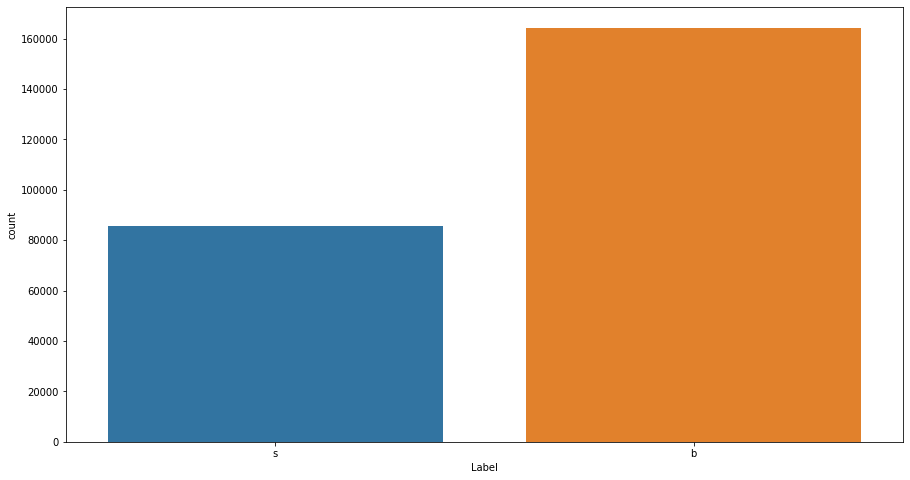

In [9]:
plt.figure(figsize = (15,8))
sns.countplot(df['Label'])
sns.set_style('darkgrid')
plt.show()

<b> <i>So as it seems like the task is both classification and  regression let's
    watch the features now

# Cleaning Data

In [40]:
### As mentioned in the details of the dataset -999 are the values which were'nt computed
### so before watching everything let's replace those guys with NA
df.replace(to_replace = -999,value = np.nan,inplace = True)

In [41]:
# Let's watch it now
df_miss = pd.DataFrame(df.isna().sum())
df_miss.columns = ['# Missing Values']
df_miss.loc[:,'% Missing'] = 100*df.isna().sum()/df.shape[0]
df_miss


,# Missing Values,% Missing
DER_mass_MMC,38114,15.2456
DER_mass_transverse_met_lep,0,0.0000
DER_mass_vis,0,0.0000
DER_pt_h,0,0.0000
DER_deltaeta_jet_jet,177457,70.9828
DER_mass_jet_jet,177457,70.9828
DER_prodeta_jet_jet,177457,70.9828
DER_deltar_tau_lep,0,0.0000
DER_pt_tot,0,0.0000
DER_sum_pt,0,0.0000


In [42]:
## let's drop those features with missing % above 10 as they will cause disparencies
## let's see which those features are and store them in a list
to_be_removed = list(df_miss[df_miss['% Missing']>10].index)
to_be_removed

['DER_mass_MMC',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi']

In [43]:
df.drop(to_be_removed,axis = 1, inplace = True)
df_test.drop(to_be_removed,axis = 1, inplace = True)
df.info()
## just left with 18 feature cols and all are floats except one
### I will now make a new dataset out of it as there are alot of rows so let's make
## a cross stratifed validated dataset with folds = 5 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 100000 to 349999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_transverse_met_lep  250000 non-null  float64
 1   DER_mass_vis                 250000 non-null  float64
 2   DER_pt_h                     250000 non-null  float64
 3   DER_deltar_tau_lep           250000 non-null  float64
 4   DER_pt_tot                   250000 non-null  float64
 5   DER_sum_pt                   250000 non-null  float64
 6   DER_pt_ratio_lep_tau         250000 non-null  float64
 7   DER_met_phi_centrality       250000 non-null  float64
 8   PRI_tau_pt                   250000 non-null  float64
 9   PRI_tau_eta                  250000 non-null  float64
 10  PRI_tau_phi                  250000 non-null  float64
 11  PRI_lep_pt                   250000 non-null  float64
 12  PRI_lep_eta                  250000 non-null  float64

# Create Folds

In [44]:
skf = StratifiedKFold(n_splits = 5 , shuffle =True , random_state = 1)


In [45]:
df['kfold'] = -1

In [46]:
df['Label'] = np.where(df['Label']=='s',1,0)

In [47]:
X = df[[col for col in df.columns if col != 'Label']]
y = df['Label'] 

In [48]:
for folds,(train_indices,val_indices) in enumerate(skf.split(X=X,y=y)):
    df.iloc[val_indices,-1]  = folds

In [49]:
df.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Label,kfold
EventId,,,,,,,,,,,,,,,,,,,,,
100000,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,1.017,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,1,0
100001,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,2.039,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0,0
100002,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,0,4
100003,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,-1.655,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,0,0
100004,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,-2.197,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,0,3


In [20]:
def box(df,col2,col1 = 'Label'):
    plt.figure(figsize = (15,7))
    sns.boxplot(data = df,x = col1,y = col2)
    sns.set_style('darkgrid')
    plt.title(col2 +' and ' + col1 )
    plt.show()
    

# Visualize 

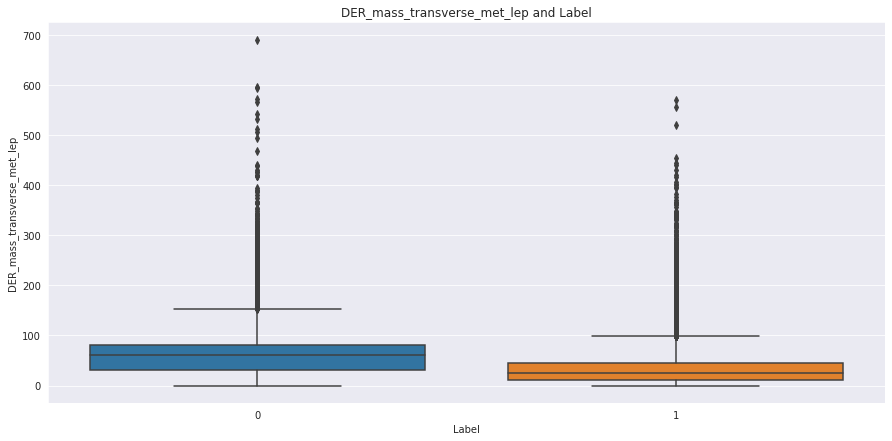

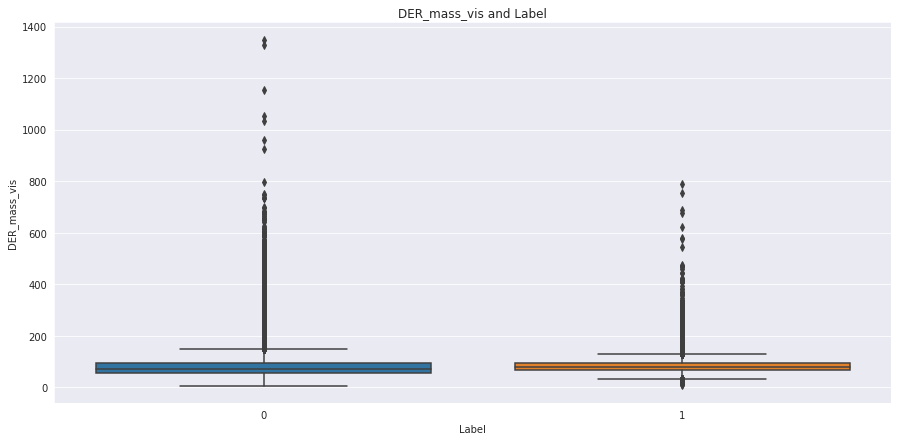

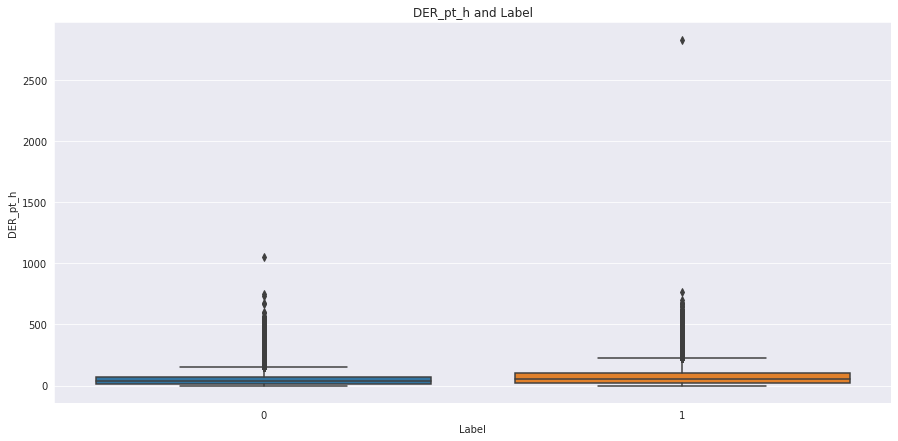

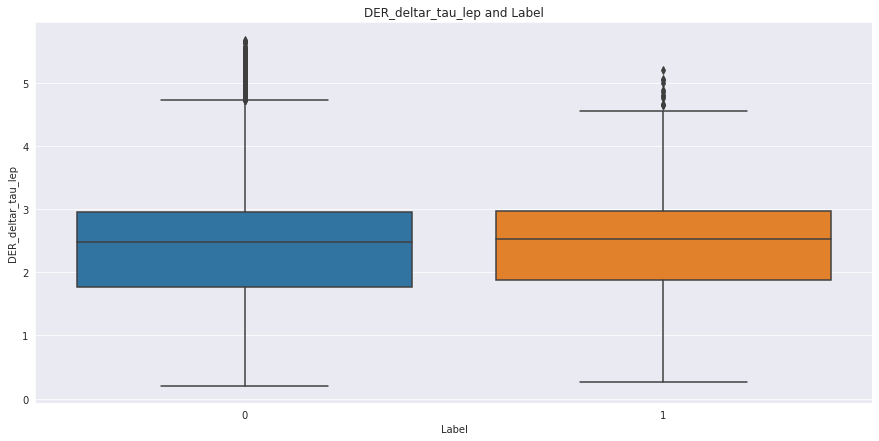

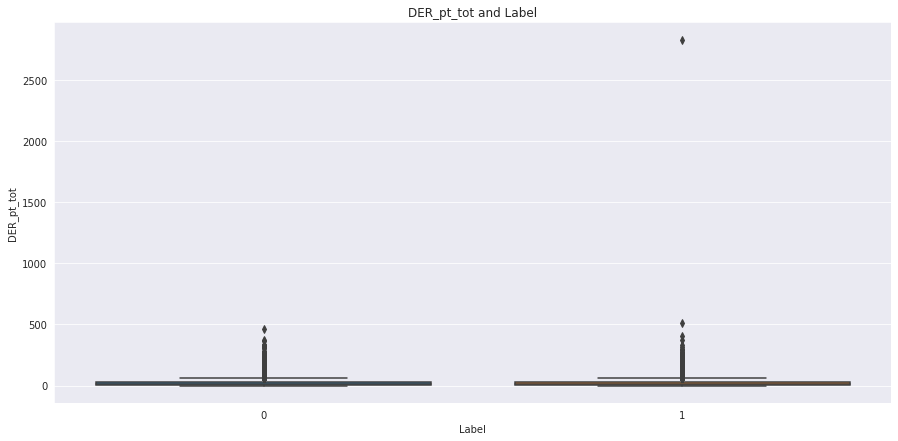

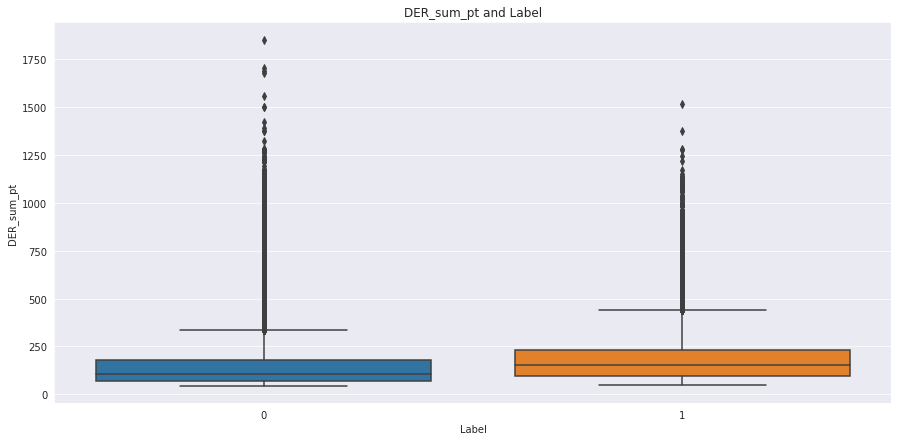

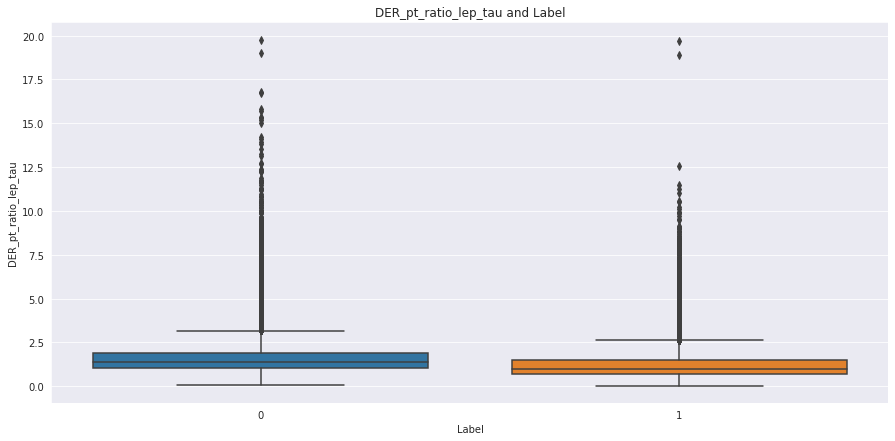

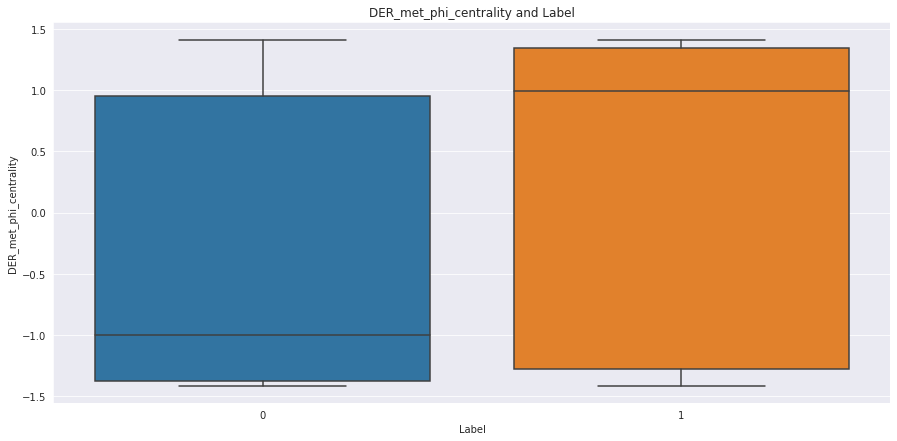

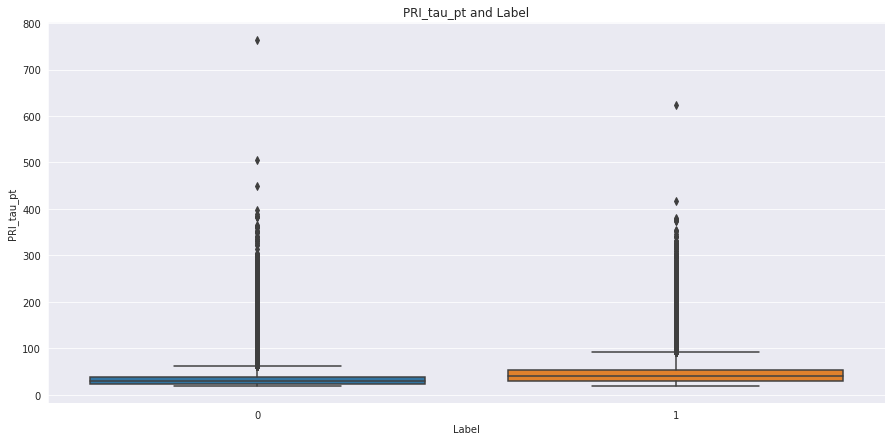

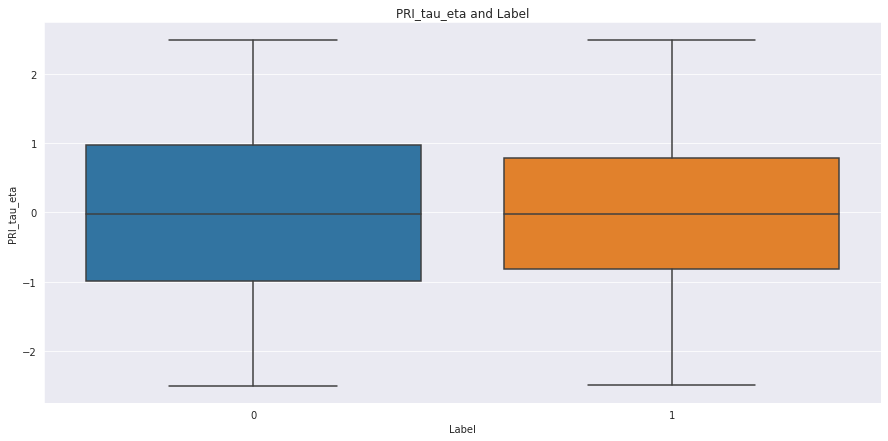

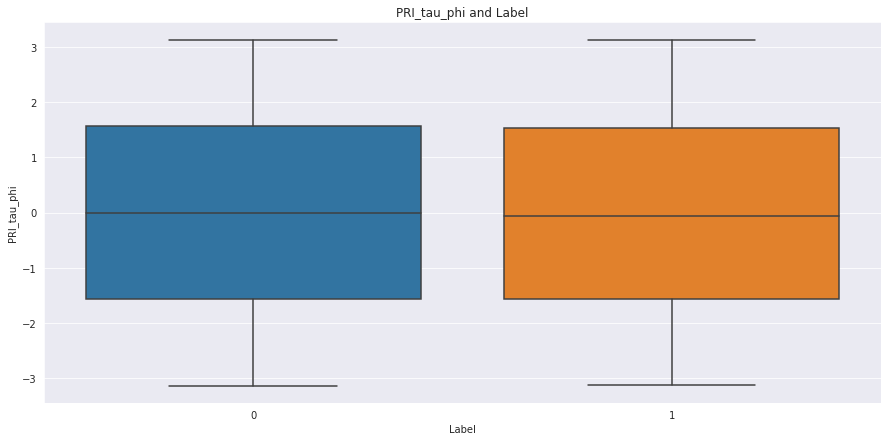

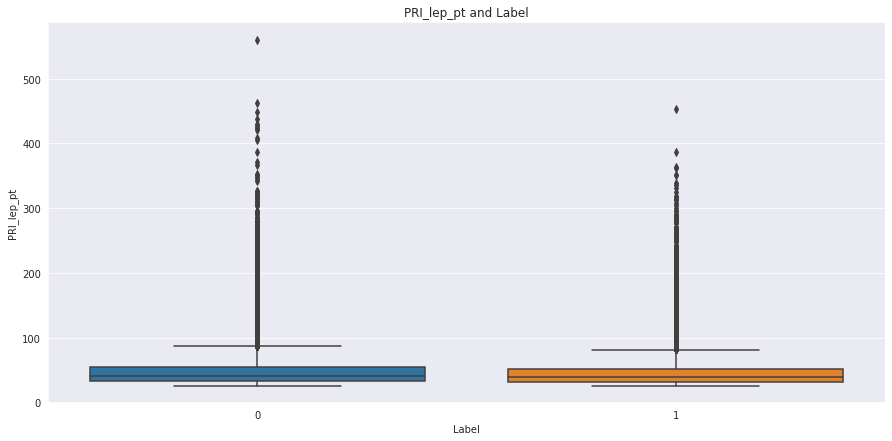

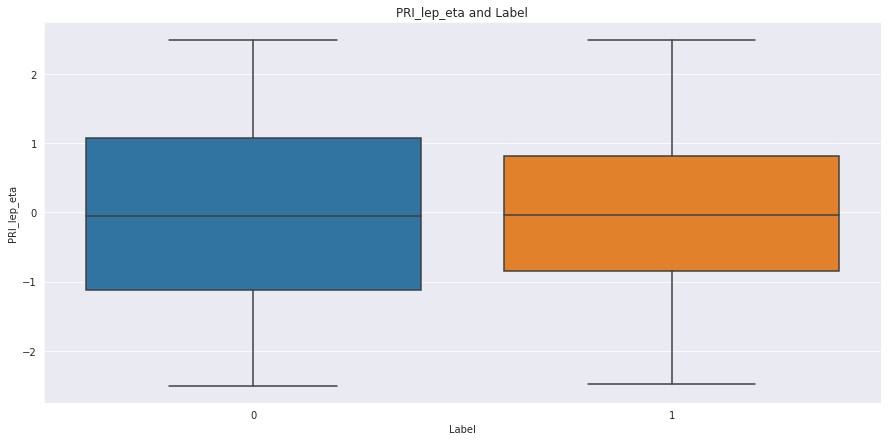

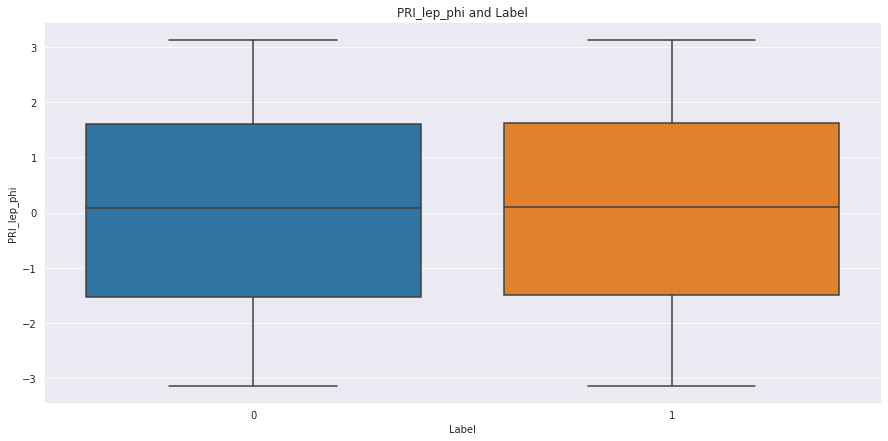

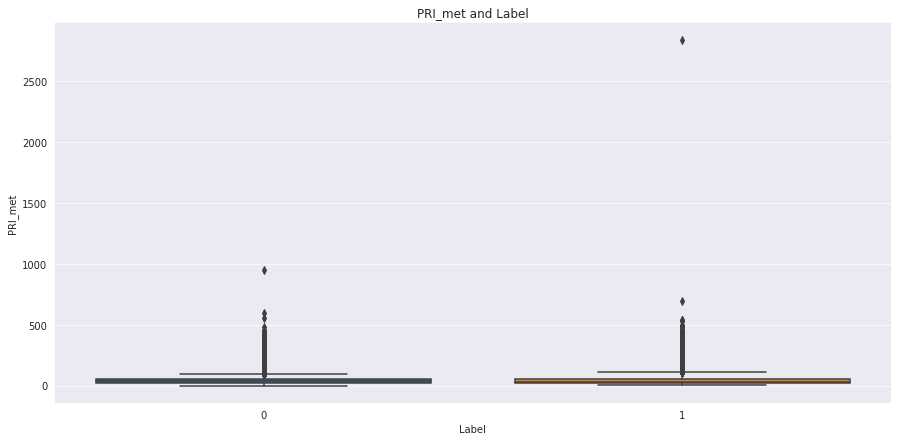

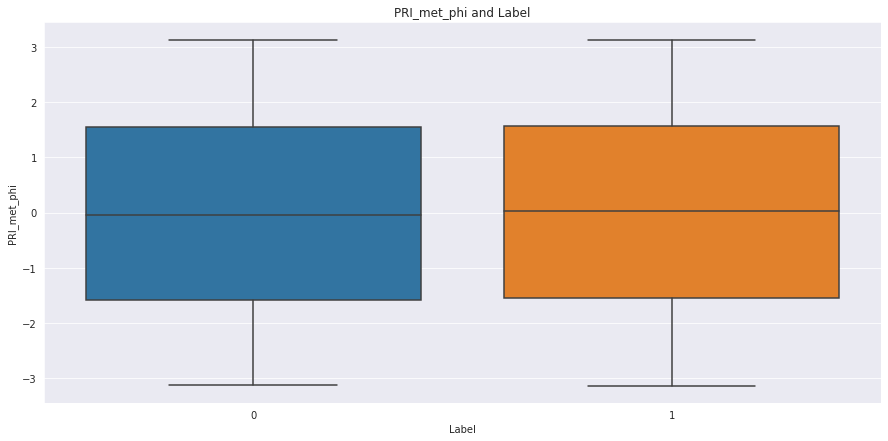

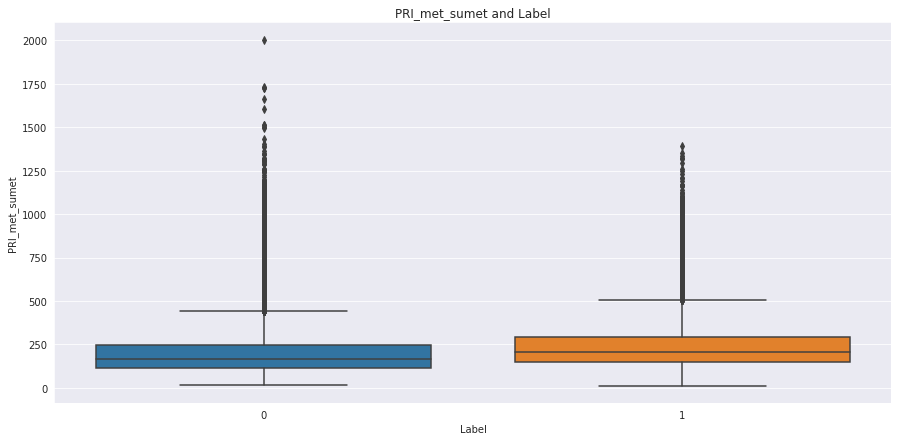

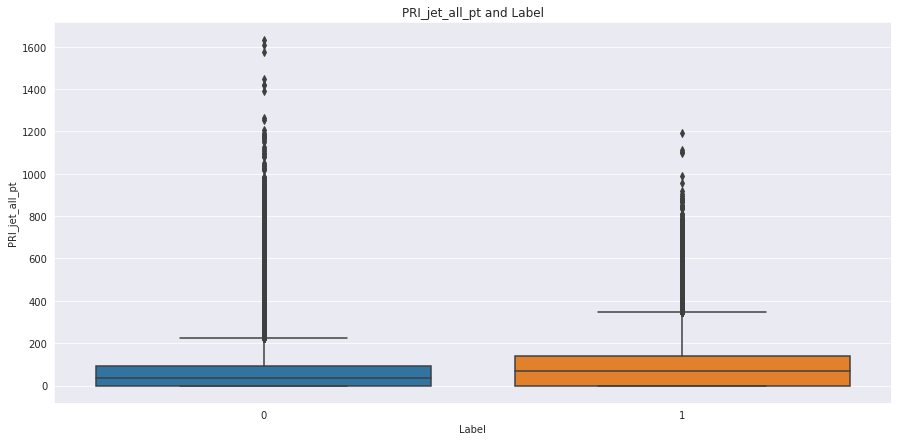

In [21]:
cont = [col for col in df.columns if col not in ['Label','PRI_jet_num','kfold']]
for i in cont:
    box(df,i)

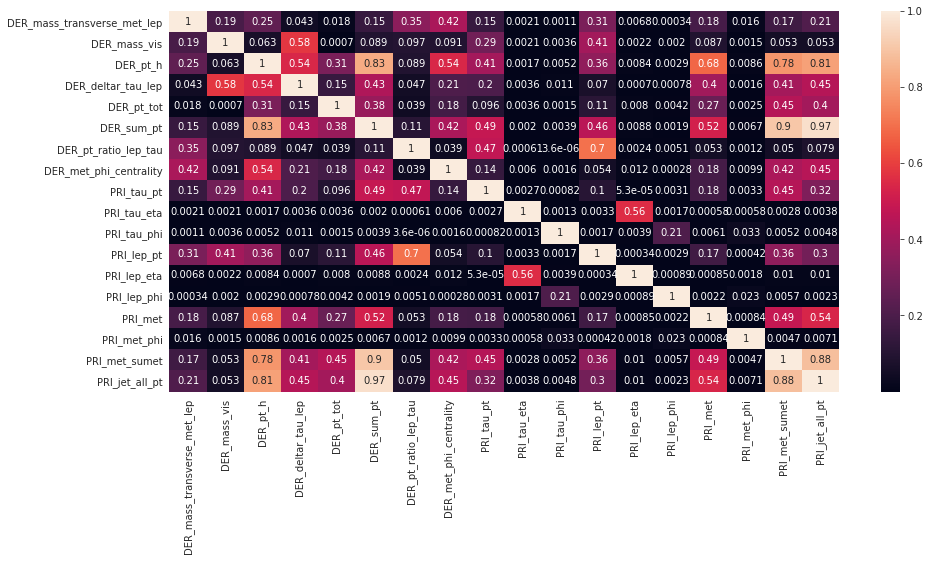

In [22]:
# let's also see if any continous features are highly correlated with each other
plt.figure(figsize = (15,7))
sns.heatmap(np.abs(df[cont].corr()),annot=True)
plt.show()

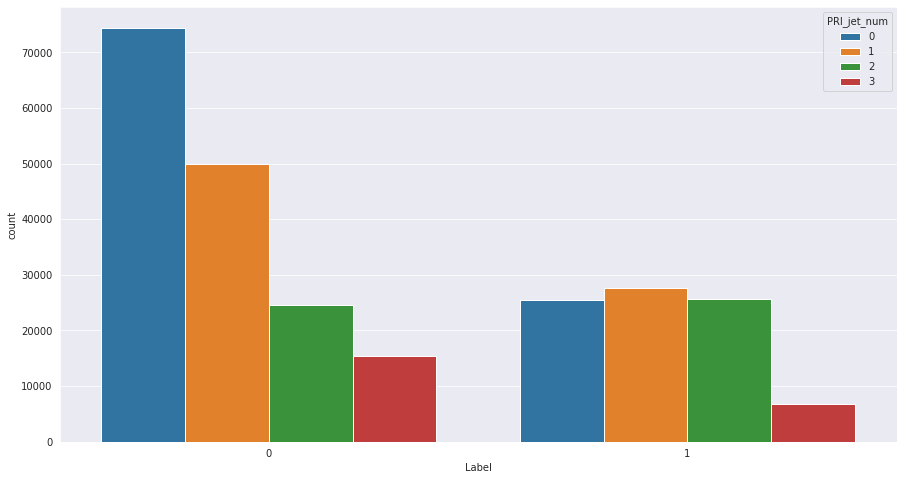

In [23]:
plt.figure(figsize = (15,8))
sns.countplot(data = df , x = 'Label',hue = 'PRI_jet_num');

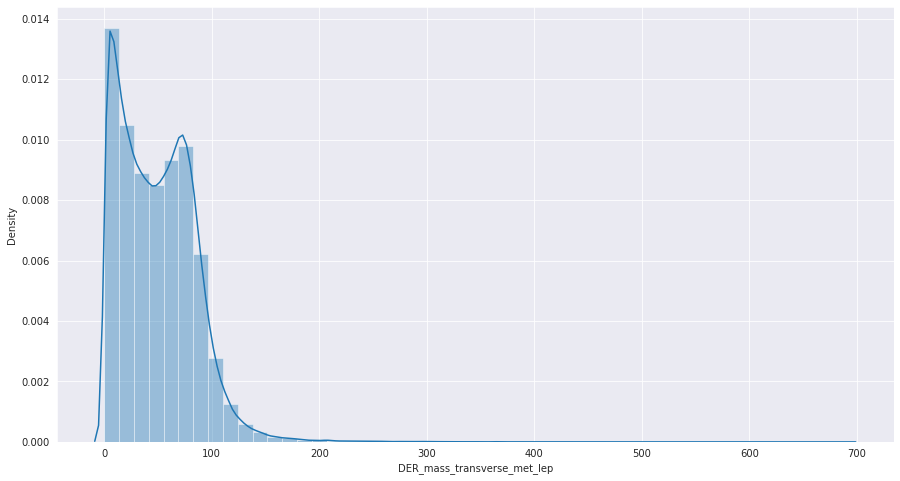

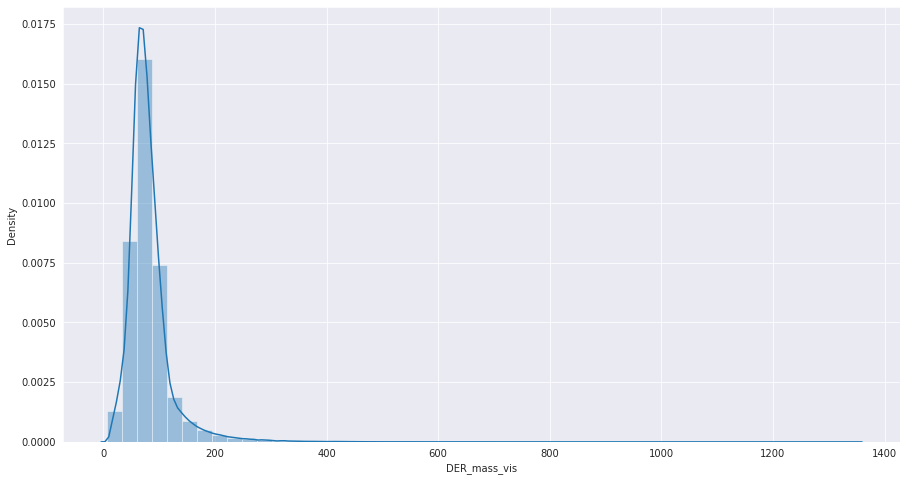

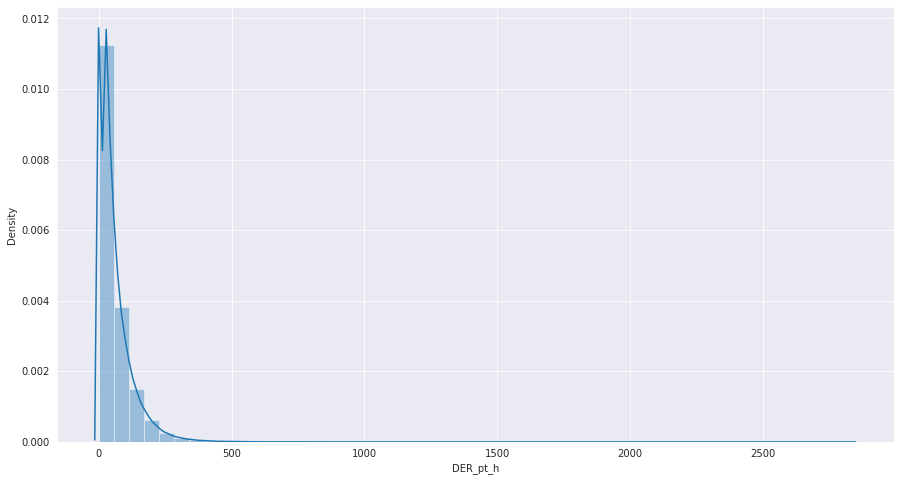

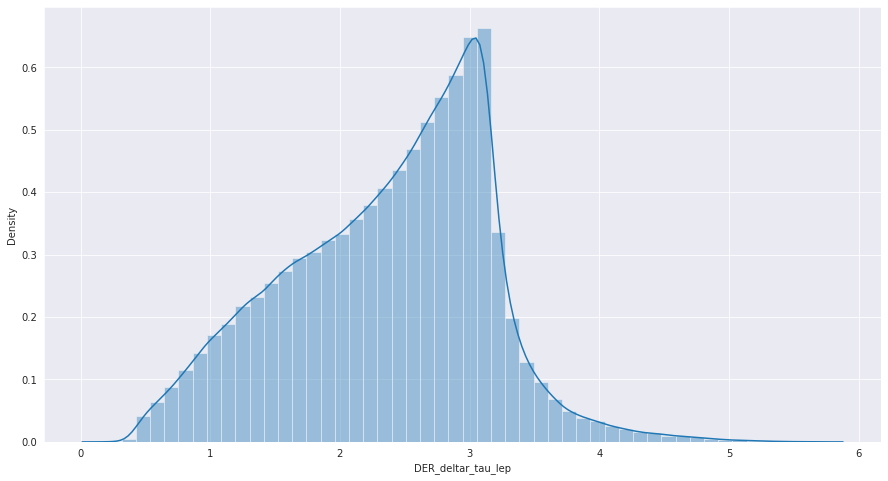

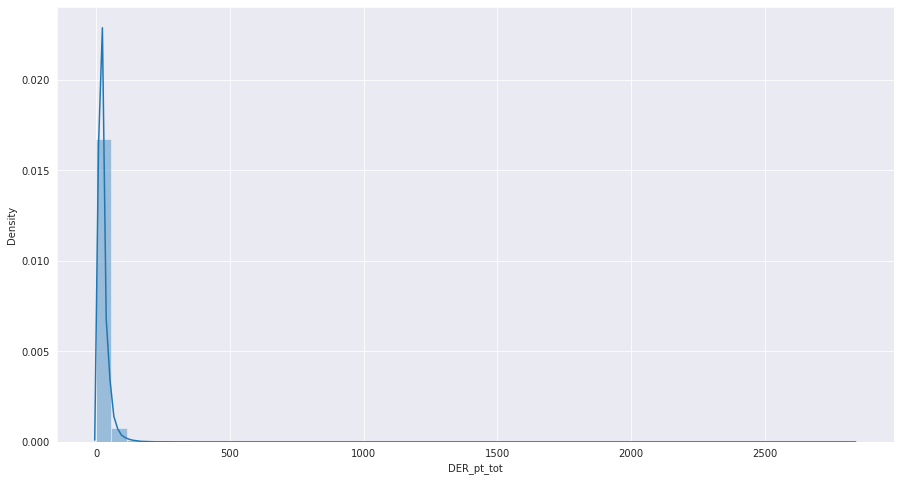

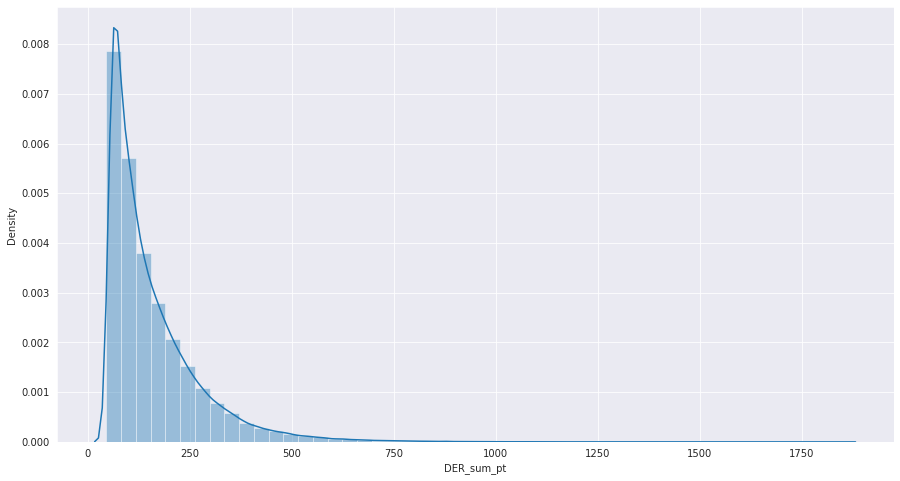

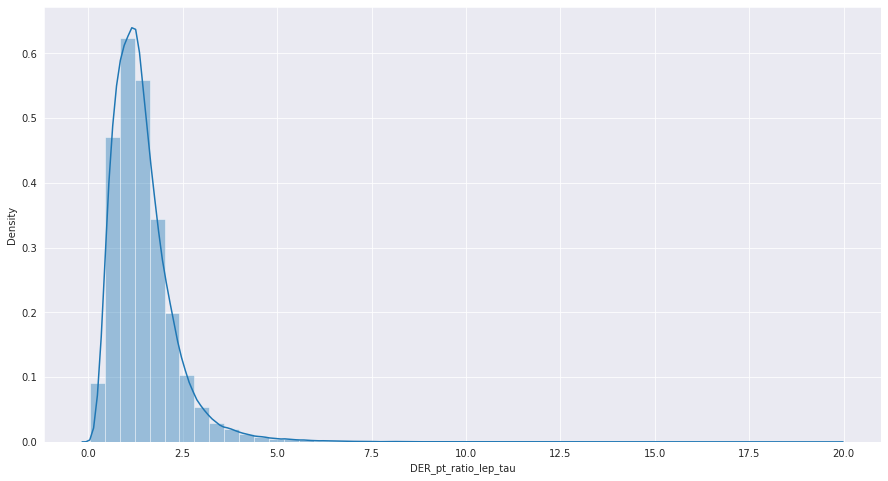

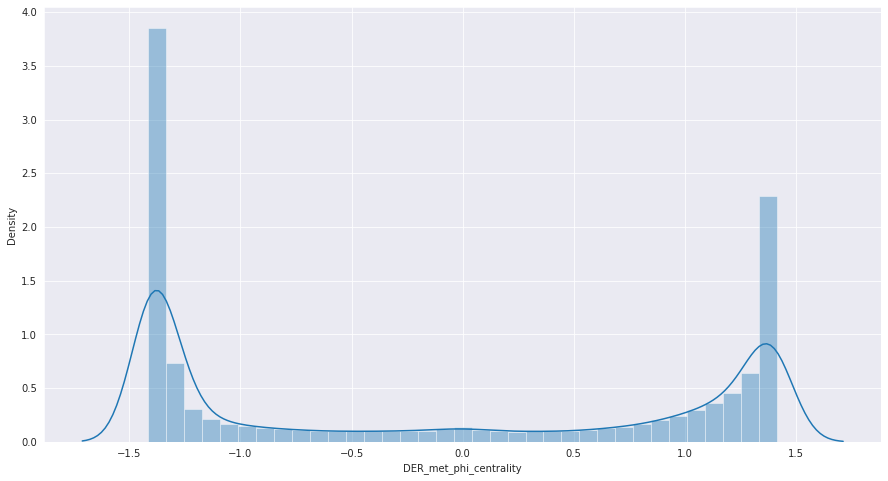

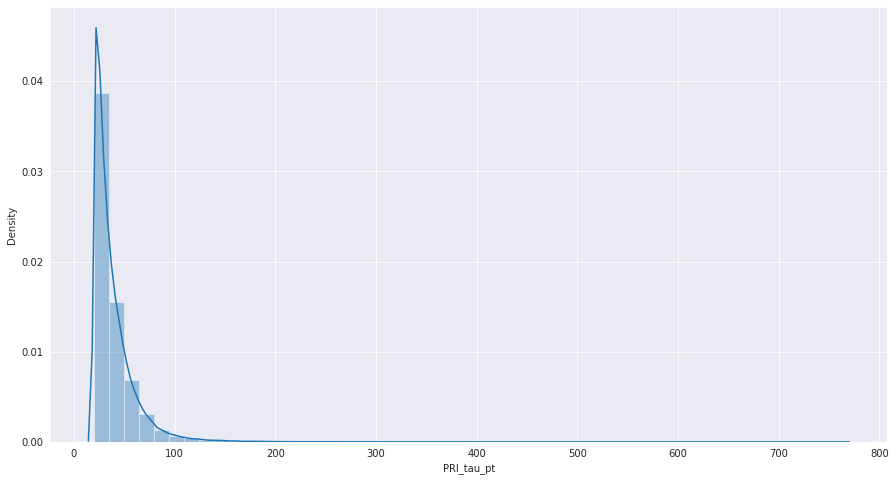

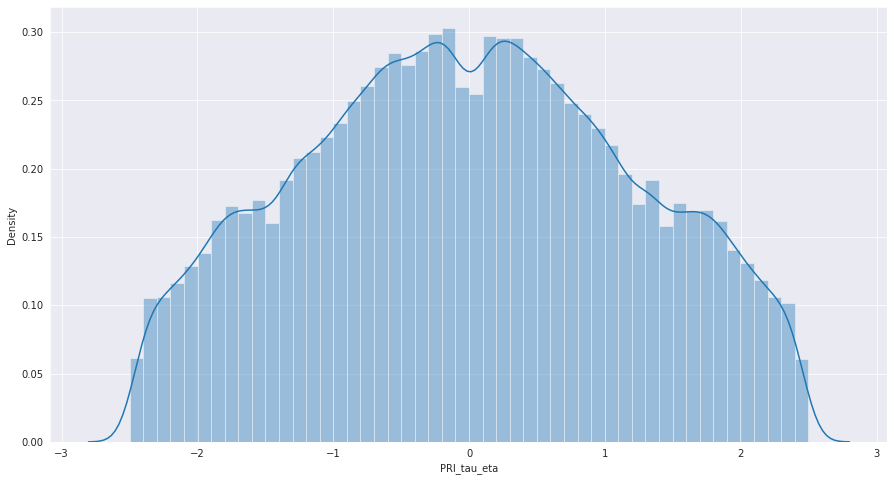

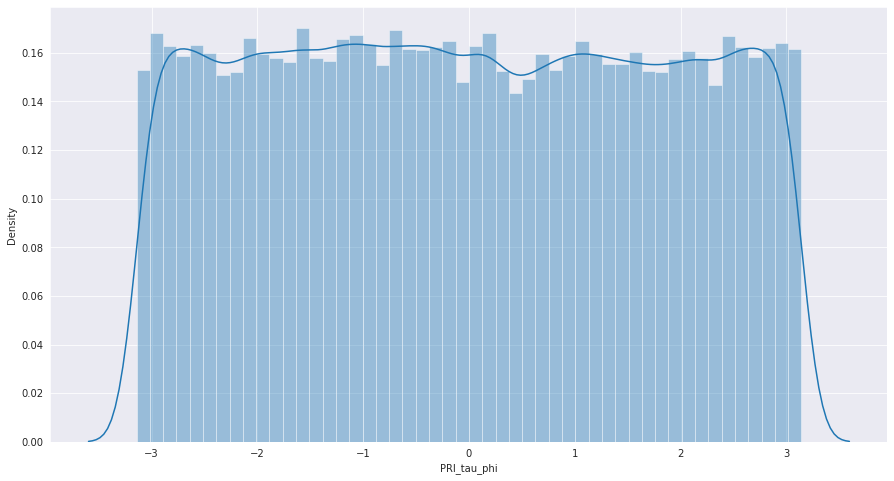

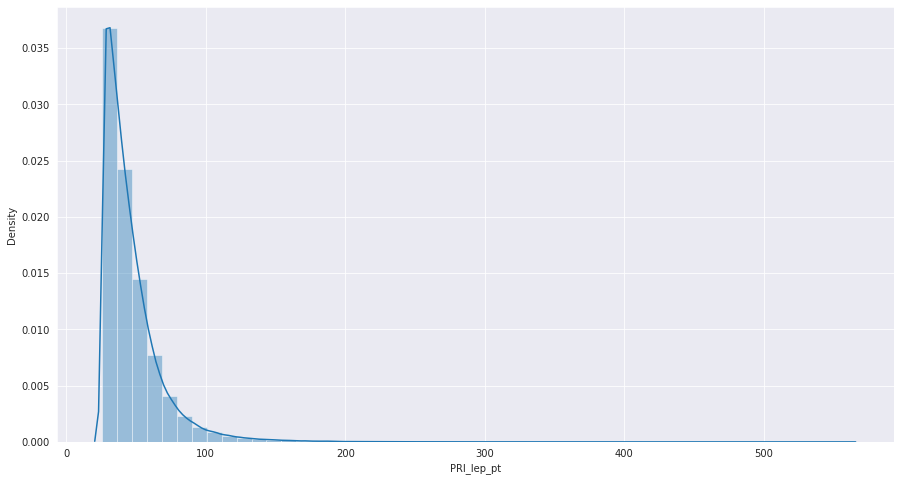

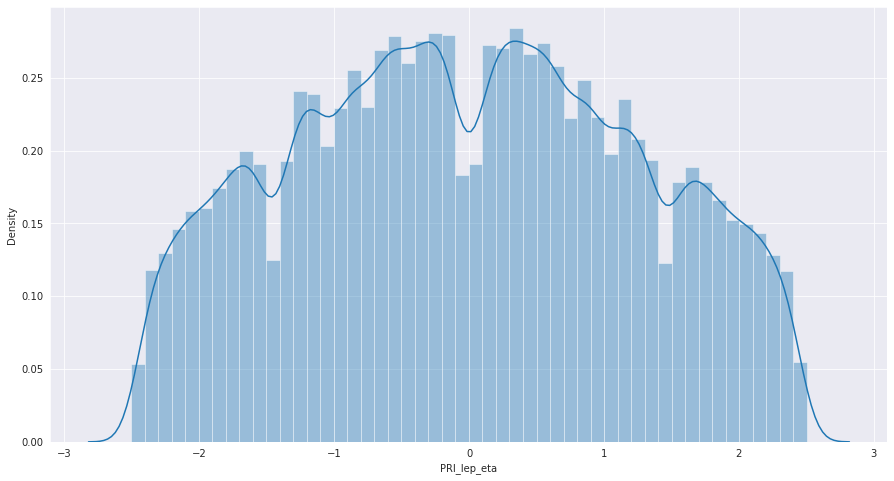

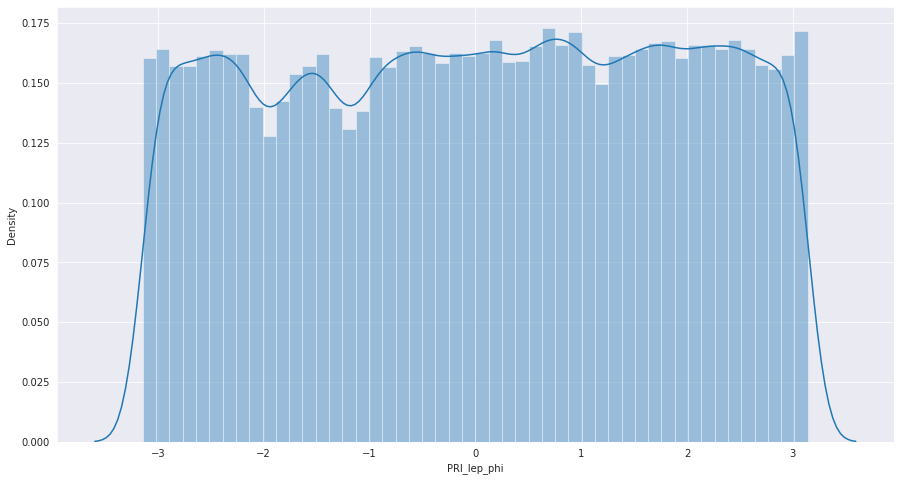

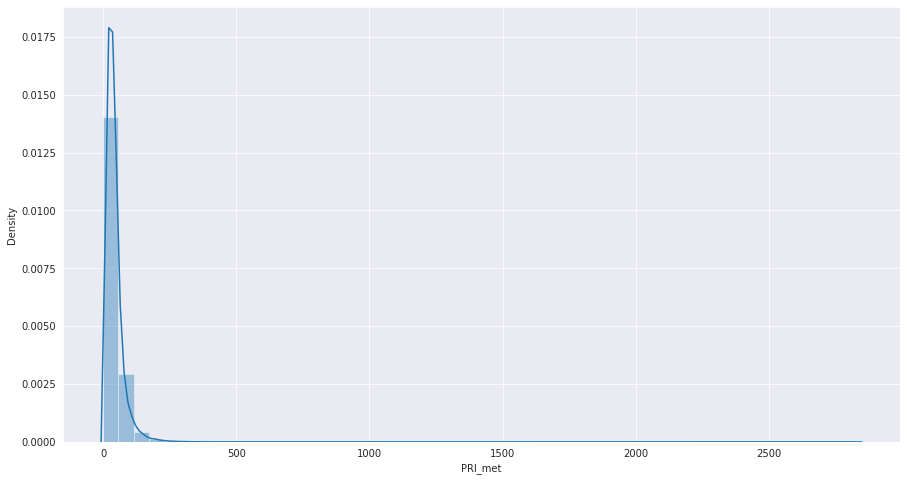

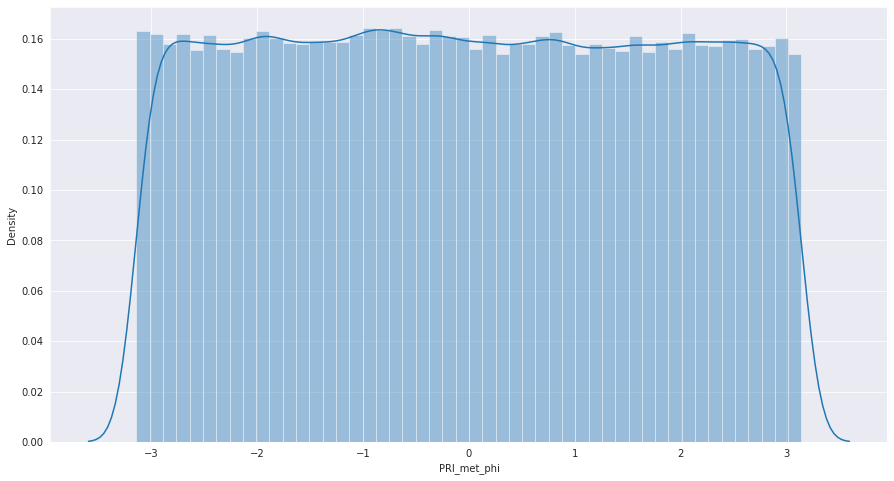

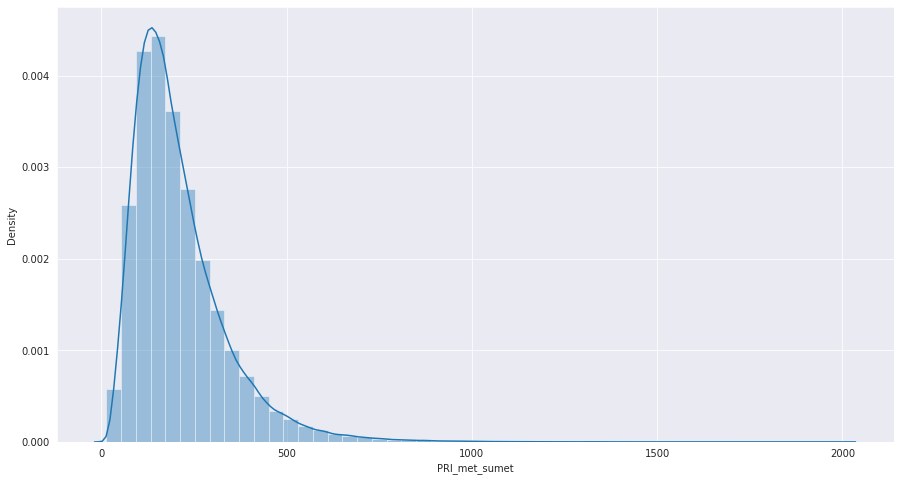

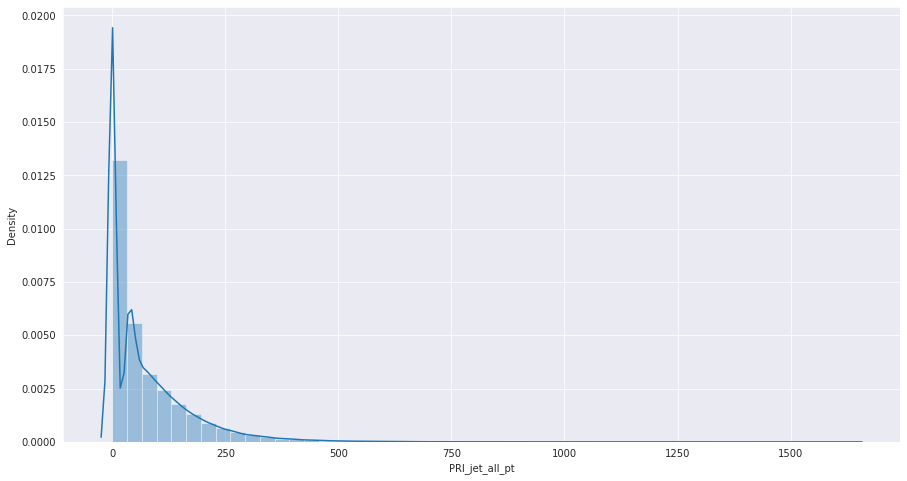

In [24]:
for  i in cont:
    plt.figure(figsize = (15,8))
    sns.distplot(df[i]);

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# mx = MinMaxScaler()
# df[cont] = mx.fit_transform(df[cont])

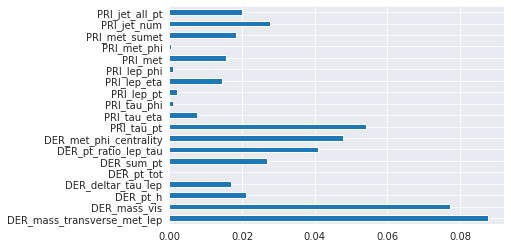

In [50]:
# feature selection using mutual_info_class
from sklearn.feature_selection import mutual_info_classif
importances  = mutual_info_classif(df.iloc[:,:-2],df['Label'])
best_features = pd.Series(importances,df.iloc[:,:-2].columns)
best_features.plot(kind='barh')
plt.show()


In [51]:
## let's choose the features whose importance is more than 0.04
useful_cols = best_features[best_features>0.04].index.tolist()
useful_cols

['DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt']

In [83]:
final_test_preds = []
final_valid_preds = {}
scores = []
df_test = df_test[useful_cols]

for fold in range(5):
    x_train = df[df.kfold!=fold].reset_index(drop=True)
    x_valid = df[df.kfold==fold].reset_index(drop=True)
    
    x_test = df_test.copy()
    
    valid_ids = x_valid.index.values.tolist()
    
    y_train = x_train.Label
    y_valid = x_valid.Label
    
    
    x_train  = x_train[useful_cols]
    x_valid = x_valid[useful_cols]
    
    
   
    

    xgb_params = {
    'n_estimators': 7000,
    'learning_rate': 0.1235,
    'subsample': 0.95,
    'colsample_bytree': 0.11,
    'max_depth': 2,
    'booster': 'gbtree', 
    'reg_lambda': 66.1,
    'reg_alpha': 15.9,
    }
    
    
    model = XGBClassifier(random_state = fold) 

    model.fit(x_train,y_train)
    
    preds_valid = model.predict(x_valid)
    preds_valid = np.where(preds_valid > 0.5 ,1,0)
    
    preds_test = model.predict(x_test)
    preds_test = np.where(preds_test > 0.5 ,1,0)
    
    final_valid_preds.update(dict(zip(valid_ids, preds_valid)))
    
    final_test_preds.append(preds_test)
    
    acc = accuracy_score(preds_valid,y_valid)
    scores.append(acc)
    
    print('***********************************************************')
    print(fold,accuracy_score(preds_valid,y_valid))
    print('***********************************************************')
    
    
    

print("Mean of scores is {} and std is {}".format(np.mean(scores) , np.std(scores)))
# final_valid_preds = pd.DataFrame.from_dict(final_valid_preds,orient='index').reset_index()



[11:47:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***********************************************************
0 0.79574
***********************************************************
[11:47:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***********************************************************
1 0.79614
***********************************************************
[11:47:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore th

In [89]:
sub.Class = np.where(np.mean(np.column_stack(final_test_preds), axis=1)>0.5,1,0)



In [85]:
sub['Class'] = np.where(sub['Class'] ==1,'s','b')
sub.head()

,RankOrder,Class
EventId,,
350000,416957,b
350001,89624,b
350002,519845,s
350003,510885,s
350004,455944,b


In [88]:
sub.to_csv("submission.csv")

In [92]:
import pickle 
pickle.dump(model, open('model.pkl', 'wb'))
 

Got an valid acc of 79 and LB score (Higgs Boson Approximate Median Significance) of 2.52954 (Private Score) and 2.53976(Public Score)
